<a href="https://colab.research.google.com/github/ferugit/speaker-recognition-exploration/blob/testing/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torchaudio
import matplotlib.pyplot as plt
import numpy as np
import torchaudio.transforms as transforms


audio_file = "path_to_the_audio_file"
waveform, sample_rate = torchaudio.load(audio_file)

In [ ]:
# Compute the spectrogram
spectrogram = torchaudio.transforms.Spectrogram()
spectrogram_output = spectrogram(waveform)

# Convert the spectrogram to decibels
spectrogram_db = torchaudio.transforms.AmplitudeToDB()(spectrogram_output)

# Calculate time values for each frame
num_frames = spectrogram_db.shape[2]
frame_shift = spectrogram.hop_length / sample_rate
time_axis = np.linspace(0, waveform.size(1) / sample_rate, num_frames)



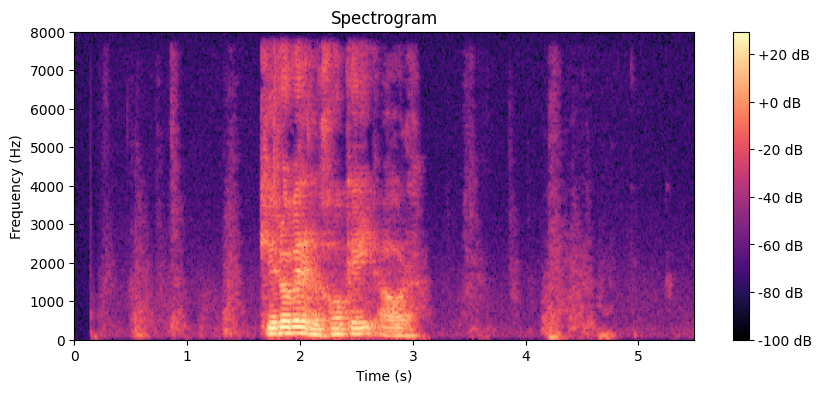

In [ ]:


# Plot the spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram_db[0].numpy(), aspect='auto', origin='lower', cmap='magma', extent=[0, time_axis[-1], 0, sample_rate / 2])
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')


plt.show()

/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


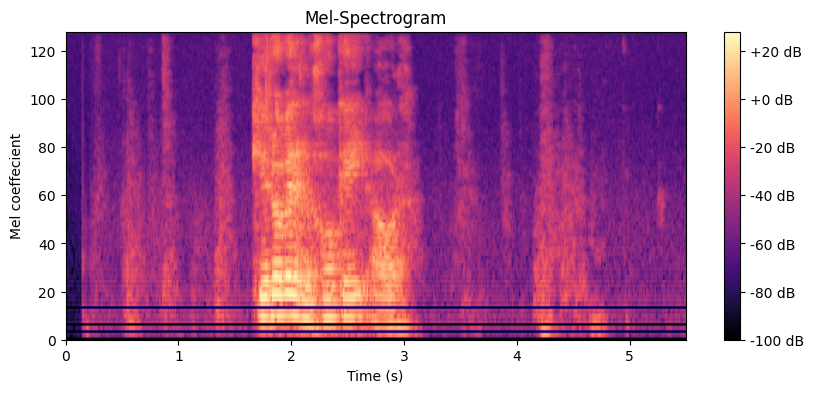

In [ ]:
# Apply the MelSpectrogram transformation
transform = transforms.MelSpectrogram(sample_rate=sample_rate)
mel_spec = transform(waveform)

# Convert to dB scale
mel_spec_db = transforms.AmplitudeToDB()(mel_spec)

# Calculate time values for each frame
num_frames = mel_spec.shape[2]
frame_shift = transform.hop_length / sample_rate
time_axis = np.linspace(0, waveform.size(1) / sample_rate, num_frames)

# Plot the mel-spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spec_db[0].detach().numpy(), cmap='magma', origin='lower', aspect='auto', extent=[0, time_axis[-1], 0, mel_spec_db.size(1)])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel coeffecient')
plt.show()

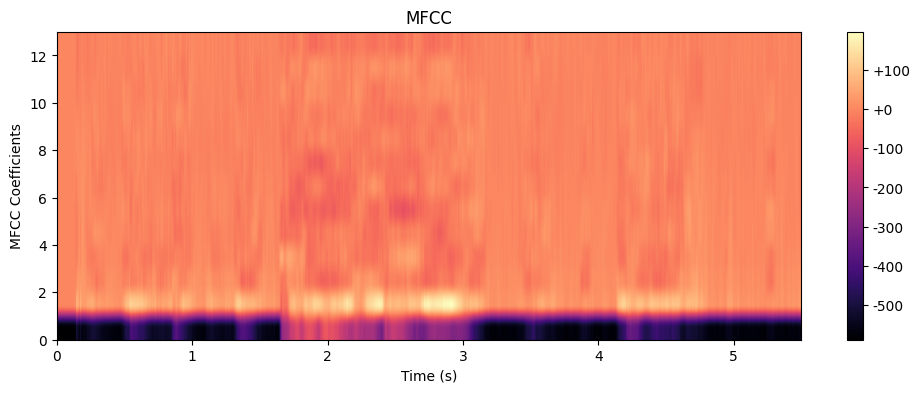

In [ ]:
# Compute the MFCC
mfcc_transform = torchaudio.transforms.MFCC(
    sample_rate=sample_rate,
    n_mfcc=13,
    melkwargs={'n_fft': 400, 'hop_length': 160, 'win_length': 400}
)
mfcc_output = mfcc_transform(waveform)

# Calculate time values for each frame
num_frames = mfcc_output.shape[2]
frame_shift = 160 / sample_rate
time_axis = np.linspace(0, waveform.size(1) / sample_rate, num_frames)


# Plot the MFCC
plt.figure(figsize=(12, 4))
plt.imshow(mfcc_output[0].detach().numpy(), cmap='magma', aspect='auto', origin='lower', extent=[0, time_axis[-1], 0, mfcc_output.size(1)])

plt.colorbar(format='%+2.0f')
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')



plt.show()


<ipython-input-3-02a3a64f8529>:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(filename)


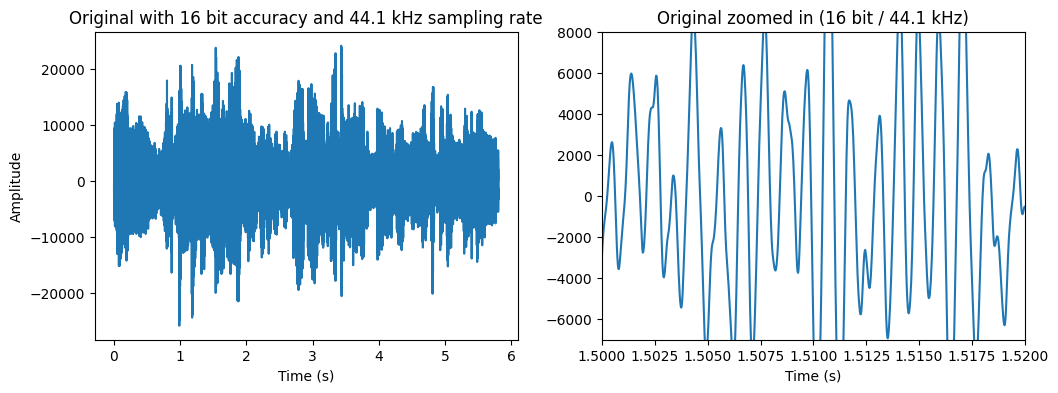

In [3]:
from scipy.io import wavfile
%matplotlib inline

filename = 'path_to_audio_file'
fs, data = wavfile.read(filename)
data = data.astype(np.int16)

fig = plt.figure(figsize=(12, 4))
ax = fig.subplots(nrows=1,ncols=2)
t = np.arange(0.,len(data))/fs
ax[0].plot(t,data)
ax[0].set_title('Original with 16 bit accuracy and ' + str(fs/1000) + ' kHz sampling rate')
ax[1].plot(t,data)
ax[1].set_title('Original zoomed in (16 bit / ' + str(fs/1000) + ' kHz)')
ax[1].set(xlim=(1.5,1.52),ylim=(-7000,8000))
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
plt.show()


